# OpenClassrooms - Projet 2
## *Préparez des données pour un organisme de santé publique*
### Open Food Facts
- **[Site officiel](https://world.openfoodfacts.org/)**
- **[Lien vers le dataset](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip)**

## Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# pip install missingno

## Importation du dataset dans un dataframe Pandas

In [3]:
# Je précise le type de certaines colonnes au moment de l'importation
# pour éviter un message d'erreur DtypeWarning (mixed types)
dtype_colonne = {
                'code': object,
                'created_t': object,
                'last_modified_t': object,
                'manufacturing_places': object,
                'manufacturing_places_tags': object,
                'emb_codes': object,
                'emb_codes_tags': object,
                'first_packaging_code_geo': object,
                'cities': object,
                'cities_tags': object,
                'allergens': object,
                'allergens_fr': object,
                'traces': object,
                'traces_tags': object,
                'traces_fr': object,
                'ingredients_from_palm_oil_tags': object,
                }

data_raw = pd.read_csv("fr.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='	')
#data_raw = pd.read_csv("en.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='	')

print('Importation terminée')

Importation terminée


## Premier aperçu du dataset

In [4]:
print("Premières lignes : ")
display(data_raw.head())


"""print("Dernières lignes")
display(data_raw.tail())
print("\n", ("#"*80), "\n")"""

print("Résumé des valeurs numériques : ")
display(data_raw.describe())


print("- Le dataset contient", data_raw.shape[0], "lignes et", data_raw.shape[1], "colonnes.")
print("- Il y a", data_raw.duplicated().sum(), "lignes en doubles.")

colonnes_vides = data_raw.columns[data_raw.nunique() == 0]
print("-", len(colonnes_vides), "colonnes du dataset sont entièrement vides :")
display(colonnes_vides.tolist())

# verbose = True pour afficher toutes les colonnes
data_raw.info()

Premières lignes : 


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Résumé des valeurs numériques : 


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


- Le dataset contient 320772 lignes et 162 colonnes.
- Il y a 0 lignes en doubles.
- 16 colonnes du dataset sont entièrement vides :


['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


## Missingno

In [5]:
"""import missingno as msno
%matplotlib inline"""

'import missingno as msno\n%matplotlib inline'

In [6]:
"""msno.matrix(data_raw.sample(250))
# The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion."""

'msno.matrix(data_raw.sample(250))\n# The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.'

In [7]:
"""msno.bar(data_raw.sample(1000))
# msno.bar is a simple visualization of nullity by column:"""

'msno.bar(data_raw.sample(1000))\n# msno.bar is a simple visualization of nullity by column:'

In [8]:
"""# msno.heatmap(data_raw)
# The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:
# donne ici une heatmap complètement illisible, éventuellement refaire une fois le nombre de colonnes réduit."""

'# msno.heatmap(data_raw)\n# The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:\n# donne ici une heatmap complètement illisible, éventuellement refaire une fois le nombre de colonnes réduit.'

In [9]:
"""msno.dendrogram(data_raw)
# The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap"""

'msno.dendrogram(data_raw)\n# The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap'

## Les données manquantes sont très nombreuses

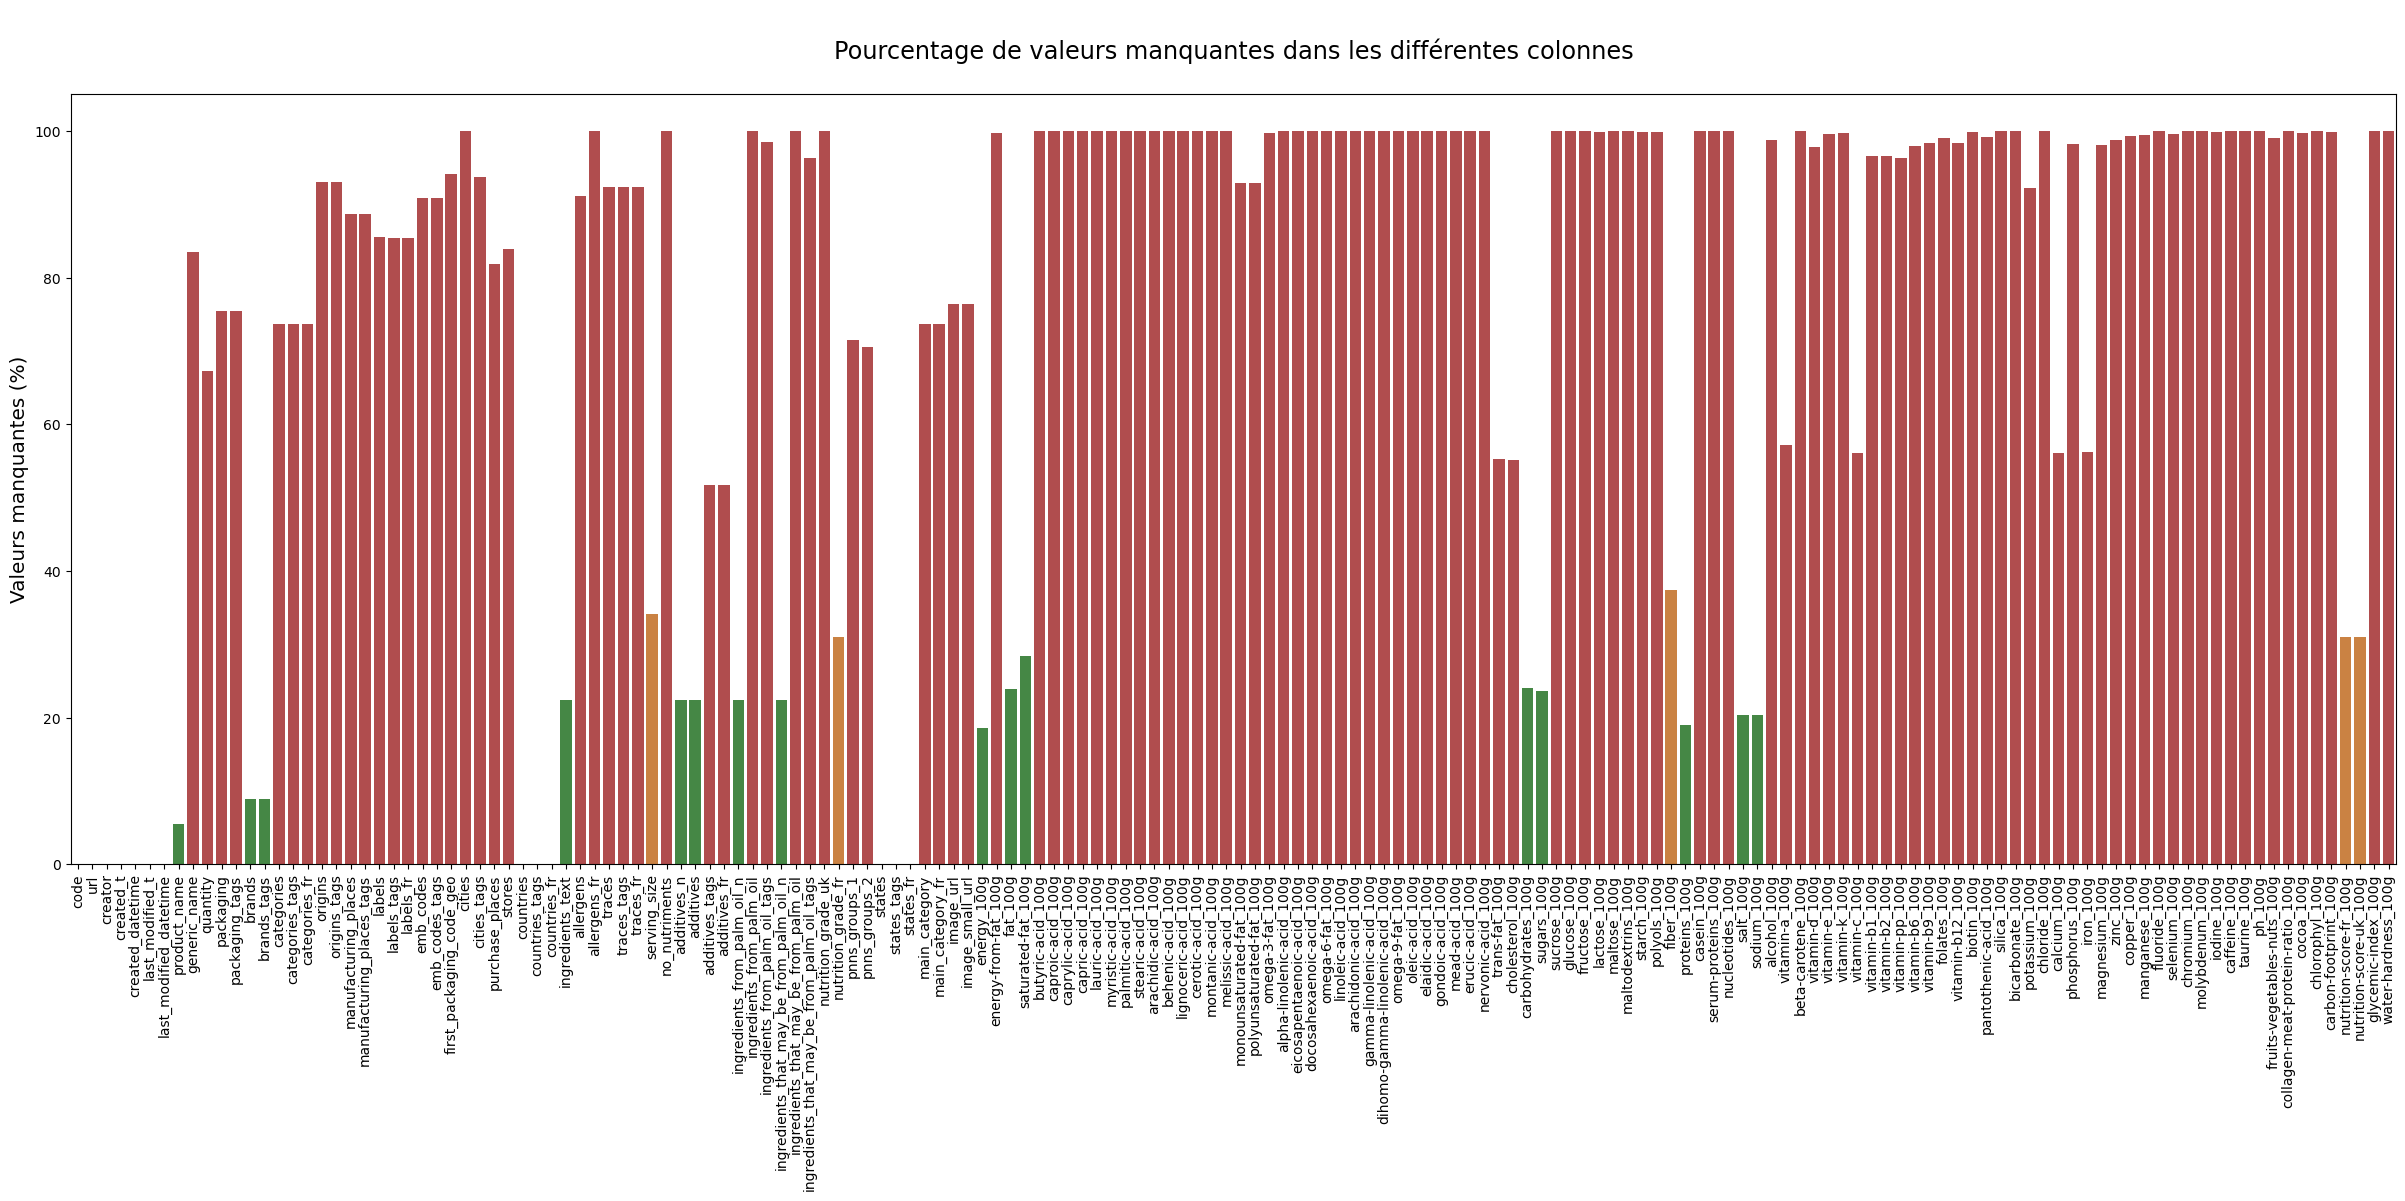


Il y a 128 colonnes avec plus de 50 % de données manquantes.


In [10]:
colonnes_incompletes = data_raw.isna().mean()

fig, ax = plt.subplots(figsize=(30,10))

# Création d'une palette personnalisée
colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100)

plt.xticks(rotation=90)
ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\n', fontsize='xx-large')
ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

plt.show()

print("\nIl y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.")

In [11]:
colonnes_nutrition = ['nutrition_grade_fr', 'nutrition_grade_uk', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']

data_raw.loc[data_raw['nutrition_grade_fr'].notna()][colonnes_nutrition]

,nutrition_grade_fr,nutrition_grade_uk,nutrition-score-fr_100g,nutrition-score-uk_100g
1,d,NaN,14.0,14.0
2,b,NaN,0.0,0.0
3,d,NaN,12.0,12.0
7,c,NaN,7.0,7.0
12,d,NaN,12.0,12.0
...,...,...,...,...
320742,a,NaN,-1.0,-1.0
320751,a,NaN,-4.0,-4.0
320757,b,NaN,0.0,0.0
320763,c,NaN,2.0,0.0


In [12]:
data_raw['nutrition-score-fr_100g'].equals(data_raw['nutrition-score-uk_100g'])
# retourne False, donc il y a des différences

False

In [13]:
comparaison = data_raw['nutrition-score-fr_100g'] == data_raw['nutrition-score-fr_100g']
comparaison.describe()

count     320772
unique         2
top         True
freq      221210
Name: nutrition-score-fr_100g, dtype: object

## Lignes différentes entre nutrition-score-fr_100g et nutrition-score-uk_100g

In [14]:
diff_score = data_raw.loc[(data_raw['nutrition-score-fr_100g'] != data_raw['nutrition-score-uk_100g']) & data_raw['nutrition-score-fr_100g'].notna()][['nutrition-score-fr_100g', 'nutrition-score-uk_100g']]
print("Différences entre nutrition-score-fr_100g et nutrition-score-uk_100g : ")
print("Il y a", len(diff_score), "différences entre ces colonnes. Soit", round((len(diff_score)/len(data_raw))*100, 2), "% du total.")

Différences entre nutrition-score-fr_100g et nutrition-score-uk_100g : 
Il y a 8322 différences entre ces colonnes. Soit 2.59 % du total.


In [15]:
nutritest = data_raw[['nutrition_grade_fr', 'nutrition_grade_uk', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']]
nutritest

,nutrition_grade_fr,nutrition_grade_uk,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN
1,d,NaN,14.0,14.0
2,b,NaN,0.0,0.0
3,d,NaN,12.0,12.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
320767,NaN,NaN,NaN,NaN
320768,b,NaN,0.0,0.0
320769,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN


In [16]:
nutritest.loc[nutritest['nutrition_grade_fr'] == "c"]['nutrition-score-fr_100g'].describe()

count    45538.000000
mean         6.367561
std          2.517749
min          2.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         10.000000
Name: nutrition-score-fr_100g, dtype: float64

## Traitement des colonnes complètement vides

- no_nutriments<br>
"indicates if the nutrition facts are indicated on the food label"<br>
Personne ne semble avoir cette information, ou alors ce n'est jamais le cas.<br>
Traitement : **suppression**<br>

- ingredients_from_palm_oil<br>
Doublon avec *ingredients_from_palm_oil_n*<br>
Traitement : **suppression**<br>

- ingredients_that_may_be_from_palm_oil<br>
Doublon avec *ingredients_that_may_be_from_palm_oil_n*<br>
Traitement : **suppression**<br>

- nutrition_grade_uk<br>
*nutrition_grade_uk* est totalement vide, mais doit pouvoir être calculé en fonction de *nutrition-score-uk_100g*<br>
De la même manière que *nutrition_grade_fr* est calculé en fonction de *nutrition-score-fr_100g*<br>
Mais pour faire le calcul, on a besoin de la catégorie.<br>
Il y a la possibilité de reprendre directement les valeurs déjà calculées de *nutrition_grade_fr*, mais il y a des différences entre *nutrition-score-fr_100g* et *nutrition-score-uk_100g* (8322, 2.59 %)<br>
Traitement : **conservation pour calcul ultérieur**<br>

- butyric-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- caproic-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- lignoceric-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- cerotic-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- melissic-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- elaidic-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- mead-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- erucic-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- nervonic-acid_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>
- chlorophyl_100g<br>
Ingrédient, présence inconnue avec les données disponibles.<br>
Traitement : **suppression**<br>

- glycemic-index_100g<br>
L'index glycémique doit être calculé expérimentalement.<br>
Si nous avions une base ingrédients/indice glycémique, nous pourrions entraîner un algorithme pour estimer.<br>
Dans l'état, nous ne pouvons rien en faire.<br>
Traitement : **suppression**<br>

- water-hardness_100g<br>
Souvent, cette valeur est simplement déterminée par la teneur en Ca et Mg.
Cela pourra être calculé.<br>
Traitement : **conservation pour calcul ultérieur**<br>

In [17]:
col_a_suppr = [
            'no_nutriments',
            'ingredients_from_palm_oil',
            'ingredients_that_may_be_from_palm_oil',
            'butyric-acid_100g',
            'caproic-acid_100g',
            'lignoceric-acid_100g',
            'cerotic-acid_100g',
            'melissic-acid_100g',
            'elaidic-acid_100g',
            'mead-acid_100g',
            'erucic-acid_100g',
            'nervonic-acid_100g',
            'chlorophyl_100g',
            'glycemic-index_100g'
            ]

data_clean = data_raw.drop(columns=col_a_suppr)

colonnes_vides = data_clean.columns[data_clean.nunique() == 0]
print("Désormais,", len(colonnes_vides), "colonnes du dataset sont entièrement vides :")
display(colonnes_vides.tolist())

Désormais, 2 colonnes du dataset sont entièrement vides :


['nutrition_grade_uk', 'water-hardness_100g']

## Traitement des colonnes presque vides




- Je vais supprimer les colonnes qui ont moins de 1000 valeurs.<br>

- Je pars du principe qu'il ne s'agit pas d'aliments qui n'en contiennent pas, mais juste que cette information n'est quasiment jamais renseignée.<br>

Traitement : **suppression** (sauf *nutrition_grade_uk* et *water-hardness_100g* qu'on devrait pouvoir imputer)


In [18]:
col_a_suppr = data_clean.columns[data_clean.notnull().sum() < 1000].to_list()
col_a_suppr.remove('water-hardness_100g')
col_a_suppr.remove('nutrition_grade_uk')

data_clean = data_clean.drop(columns=col_a_suppr)

In [19]:
col_a_suppr

['cities',
 'allergens_fr',
 'energy-from-fat_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'montanic-acid_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'gondoic-acid_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'beta-carotene_100g',
 'vitamin-k_100g',
 'biotin_100g',
 'silica_100g',
 'bicarbonate_100g',
 'chloride_100g',
 'fluoride_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g'

## Traitement des colonnes inutiles

- creator<br>
Ne nous intéresse pas.<br>
Traitement : **suppression**<br>

- created_t<br>
Doublon avec *created_datetime*<br>
Traitement : **suppression**<br>

- last_modified_t<br>
Ne nous intéresse pas.<br>
Traitement : **suppression**<br>

- last_modified_datetime<br>
Ne nous intéresse pas.<br>
Traitement : **suppression**<br>

- generic_name<br>
83 % de données manquantes et quand présent ne suit pas une même règle. Pas exploitable.<br>
Traitement : **suppression**<br>

- packaging et packaging_tags<br>
Valeurs manquantes aux mêmes endroits. Trop de variabilité dans la structure des valeurs, non exploitable.<br>
Traitement : **suppression**<br>

- brands<br>
Doublon avec *brands_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- categories<br>
Doublon avec *categories_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- categories_fr<br>
Doublon avec *categories*, lui-même doublon de *categories_tags*.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- origins<br>
Doublon avec *origins_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- manufacturing_places<br>
Doublon avec *manufacturing_places_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- labels<br>
Doublon avec *labels_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- labels_fr<br>
Doublon avec *labels_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- emb_codes<br>
Trop de valeurs manquantes. Ne nous intéresse pas.<br>
Traitement : **suppression**<br>

- emb_codes_tags<br>
Trop de valeurs manquantes. Ne nous intéresse pas.<br>
Traitement : **suppression**<br>

- first_packaging_code_geo<br>
Trop de valeurs manquantes et les colonnes qui permettraient de déduire ont trop de valeurs manquantes aussi.<br>
Traitement : **suppression**<br>

- cities_tags<br>
Trop de valeurs manquantes et les colonnes qui permettraient de déduire ont trop de valeurs manquantes aussi.<br>
Traitement : **suppression**<br>

- purchase_places<br>
Trop de valeurs manquantes et pas possible de les déduire.<br>
Traitement : **suppression**<br>

- stores<br>
Trop de valeurs manquantes et pas possible de les déduire.<br>
Traitement : **suppression**<br>

- countries<br>
Doublon avec *countries_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- countries_fr<br>
Doublon avec *countries_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- traces<br>
Doublon avec *traces_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- traces_fr<br>
Doublon avec *traces_tags*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- main_category_fr<br>
Doublon avec *main_category*, qui est mieux normalisé.<br>
Valeurs manquantes aux mêmes endroits, pas utile de conserver.<br>
Traitement : **suppression**<br>

- additives<br>
Contient pas mal de donnée de type ingrédient, qui ne sont pas des additifs.<br>
Mieux vaut garder seulement la colonne *additives_tags* qui est plus pertinente.<br>
Traitement : **suppression**<br>

- additives_fr<br>
Doublon de *additives_tags*<br>
Traitement : **suppression**<br>

- states, states_tags et states_fr<br>
Ne nous intéresse pas ici.<br>
Traitement : **suppression**<br>

- salt_100g<br>
Doublon avec *sodium_100g*.<br>
Traitement : **suppression**<br>

- image_url et image_small_url<br>
Trop de valeurs manquantes, et pas possible de déterminer à partir de url car la structure n'est pas constante.<br>
Traitement : **suppression**<br>


In [20]:
col_a_suppr = [
            'creator',
            'created_t',
            'last_modified_t',
            'last_modified_datetime',
            'generic_name',
            'packaging',
            'packaging_tags',
            'brands',
            'categories',
            'categories_fr',
            'origins',
            'manufacturing_places',
            'labels',
            'labels_fr',
            'emb_codes',
            'emb_codes_tags',
            'first_packaging_code_geo',
            'cities_tags',
            'purchase_places',
            'stores',
            'countries',
            'countries_fr',
            'traces',
            'traces_fr',
            'main_category_fr',
            'additives',
            'additives_fr',
            'states',
            'states_tags',
            'states_fr',
            'salt_100g',
            'image_url',
            'image_small_url'
            ]

data_clean = data_clean.drop(columns=col_a_suppr)

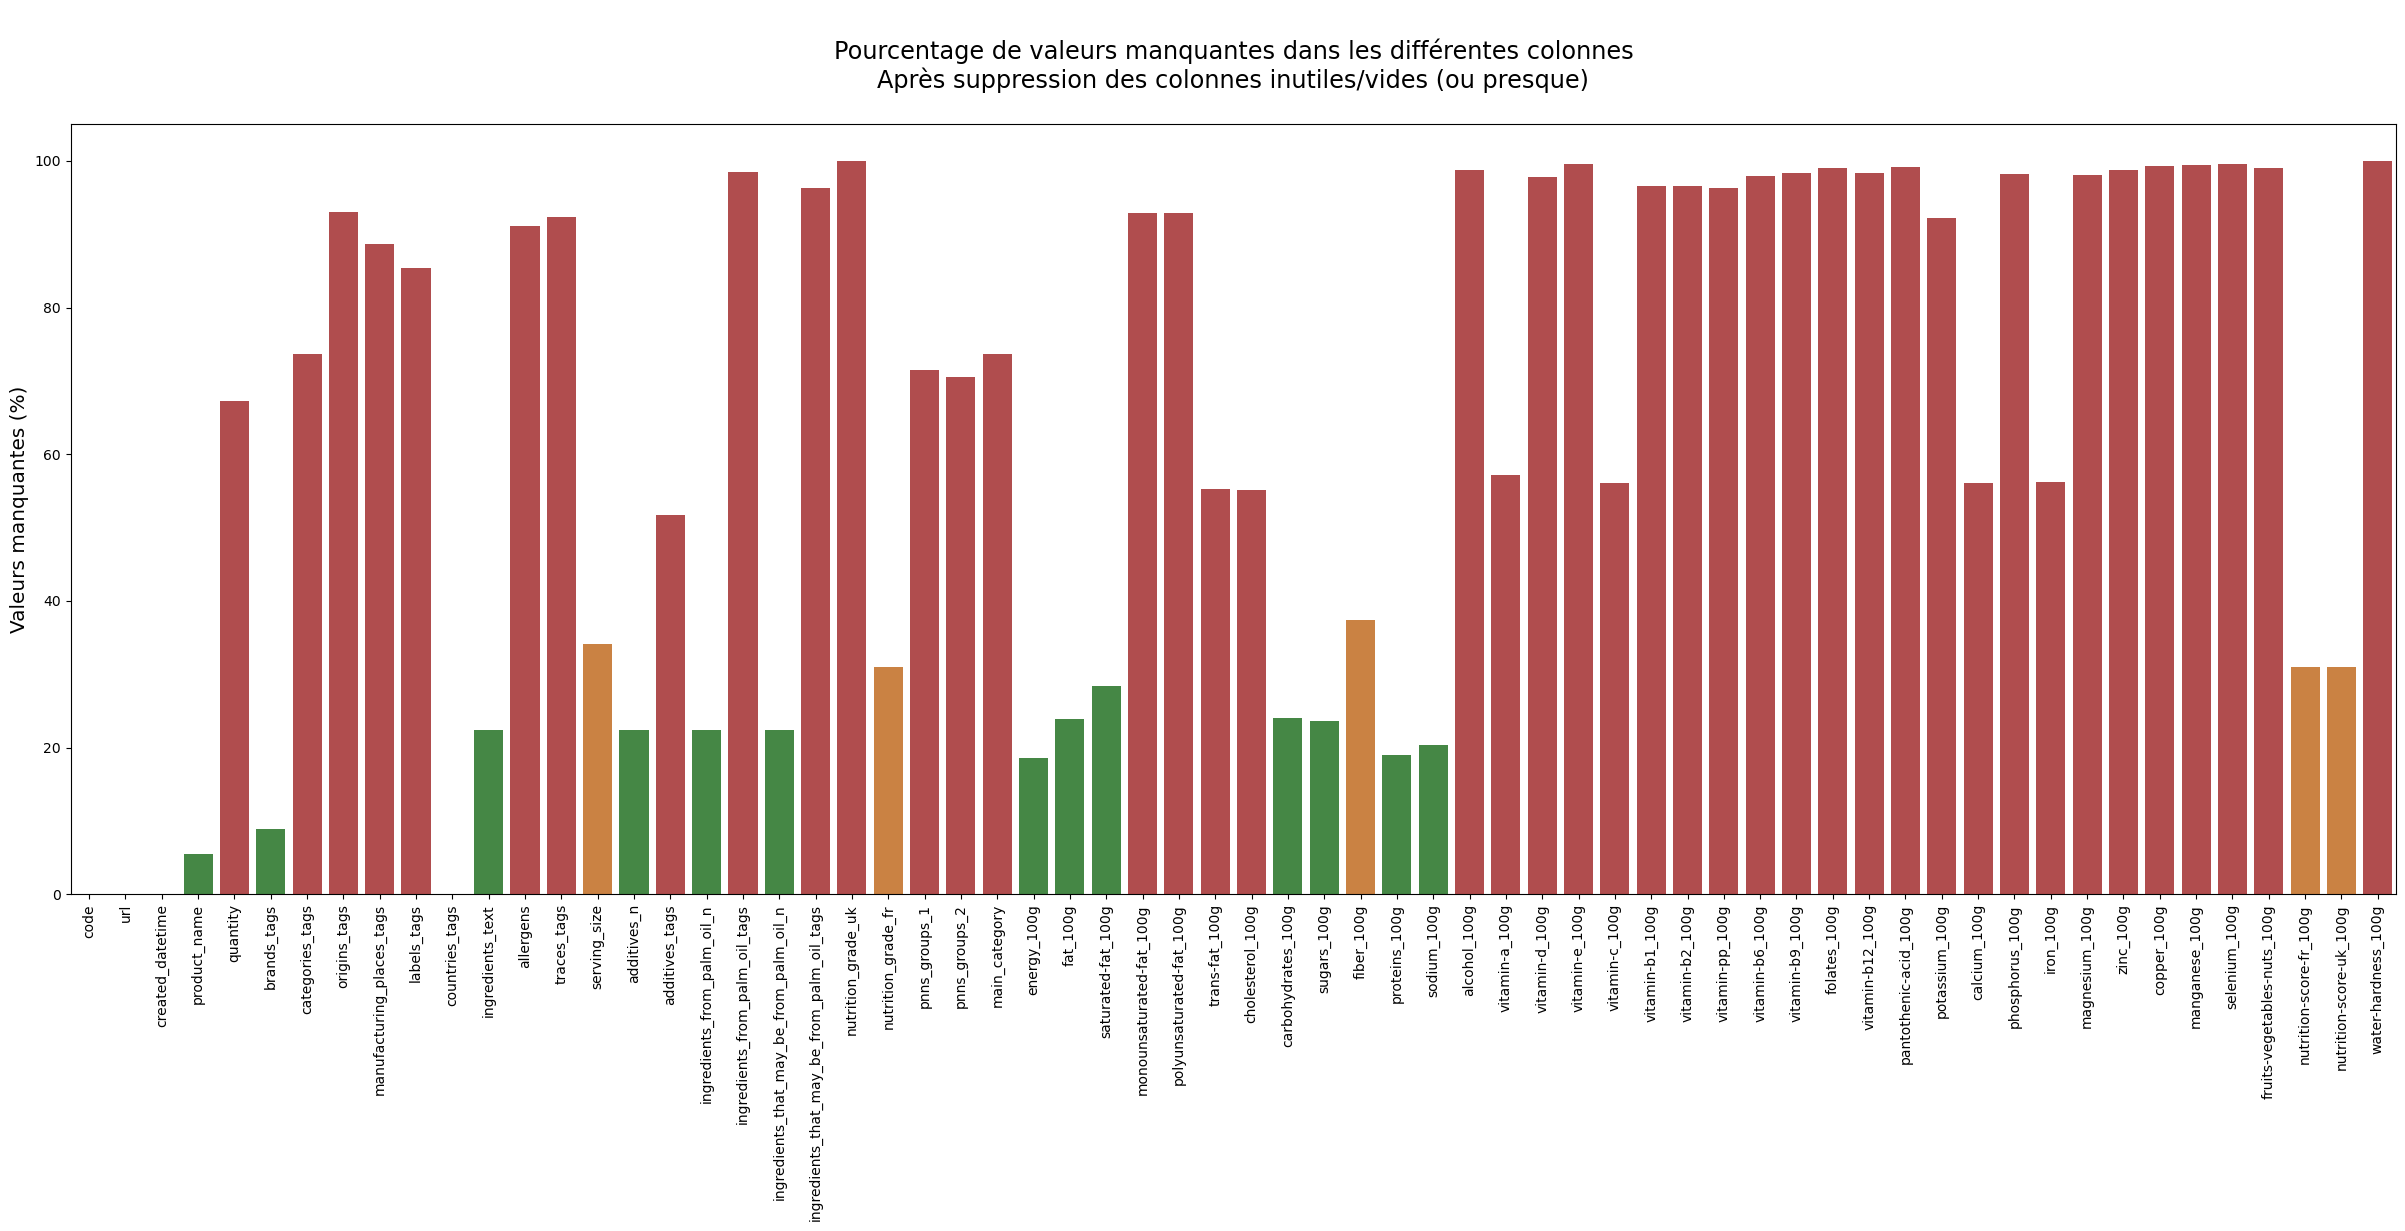


Il y a 42 colonnes avec plus de 50 % de données manquantes.


In [21]:
colonnes_incompletes = data_clean.isna().mean()

fig, ax = plt.subplots(figsize=(30,10))

# Création d'une palette personnalisée
colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100)

plt.xticks(rotation=90)
ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\nAprès suppression des colonnes inutiles/vides (ou presque)\n', fontsize='xx-large')
ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

plt.show()

print("\nIl y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.")

## Traitement du type des colonnes

### Conversion de la colonne *created_datetime* au format date

In [22]:
data_clean['created_datetime'] = pd.to_datetime(data_clean['created_datetime'], errors='coerce')

### Conversion de la colonne *nutrition_grade_uk* au format object

In [23]:
data_clean['nutrition_grade_uk'] = data_clean['nutrition_grade_uk'].astype(object)

### Les colonnes quantity et serving_size sont en object, car le format des données est très varié (kg, g, oz, expressions, etc)
Compliqué de faire mieux pour le moment.

In [24]:
"""for i in data_clean.loc[data_clean['quantity'].str.contains("kg", case=False, na=False) == True]['quantity']:
    try:
        i = float(i[:-2])*1000
    except:
        print(i)"""

'for i in data_clean.loc[data_clean[\'quantity\'].str.contains("kg", case=False, na=False) == True][\'quantity\']:\n    try:\n        i = float(i[:-2])*1000\n    except:\n        print(i)'

In [25]:
"""data_clean.loc[data_clean['quantity'].str.contains("kg", case=False, na=False) == True]['quantity']"""

'data_clean.loc[data_clean[\'quantity\'].str.contains("kg", case=False, na=False) == True][\'quantity\']'

## Traitement des valeurs aberrantes



CE1 Vous avez mis en évidence et analysé les éventuels outliers d’un point de vue statistique, afin de s’assurer s’il s’agit de valeurs aberrantes ou atypiques

### Macro nutriments

In [26]:
# Les colonnes de fat_100g à alcohol_100g (les suivantes sont souvent exprimées en mg, je les traiterai après), et j'ajoute les fruits/légumes/noix (fruits-vegetables-nuts_100g)
macro_nutriments = data_clean.columns[27:39].to_list() + data_clean.columns[-4:-3].to_list()

# Je mets toutes les valeurs en positif
data_clean[macro_nutriments] = data_clean[macro_nutriments].abs()

# Je supprime toutes les valeurs > 100, puisque c'est normalement des valeurs pour 100g
for i in macro_nutriments:
    data_clean[i][data_clean[i] > 100] = np.nan



C:\Users\Data Science\AppData\Local\Temp\ipykernel_38260\1120044707.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i][data_clean[i] > 100] = np.nan


### Micro nutriments

In [27]:
micro_nutriments = data_clean.columns[39:-4]

# Je mets toutes les valeurs en positif
data_clean[micro_nutriments] = data_clean[micro_nutriments].abs()

"""for i in micro_nutriments:
    display(data_clean[i].describe())"""

'for i in micro_nutriments:\n    display(data_clean[i].describe())'

In [28]:
"""for i in macro_nutriments:
    print(i)
    data_clean[i].hist(density=True,bins=90)
    plt.show()

for i in micro_nutriments:
    print(i)
    data_clean[i].hist(density=True,bins=90)
    plt.show()"""

'for i in macro_nutriments:\n    print(i)\n    data_clean[i].hist(density=True,bins=90)\n    plt.show()\n\nfor i in micro_nutriments:\n    print(i)\n    data_clean[i].hist(density=True,bins=90)\n    plt.show()'

## Imputation des valeurs manquantes : ingrédients spécifiques


### Micro nutriments


- Je pars du principe que les valeurs manquantes dans les colonnes micro nutriments (vitamines, etc) le sont car il n'y en a pas dans les aliments concernés : on peut donc remplacer par 0.

In [29]:
for i in micro_nutriments:
    data_clean[i].fillna(0,inplace=True)

### Autres nutriments

- Je pars du même principe pour les éléments suivants : *fat_100g*, *saturated-fat_100g*, *sugars_100g*, *sodium_100g*, *fiber_100g*, *proteins_100g* et *fruits-vegetables-nuts_100g*.<br>
En effet, ils font partie des éléments importants et normalement bien indiqués sur les emballages. Ils font partie des éléments prix en compte pour le calcul du Nutriscore.<br>
- Pour *cocoa_100g* et *alcohol_100g*, ce n'est pas étonnant qu'ils soient peu renseignés, en proprotions peu d'aliments en contiennent. Je mets à 0 les NaN également.

In [30]:
elem_imp = [
    'fat_100g',
    'saturated-fat_100g',
    'sugars_100g',
    'sodium_100g',
    'fiber_100g',
    'proteins_100g',
    'fruits-vegetables-nuts_100g',
    'alcohol_100g'
]

for i in elem_imp:
    data_clean[i].fillna(0,inplace=True)

### Hydrates de carbone
- On part du principe que *carbohydrates_100g* est la sommes des éléments suivants : <br>
sugars_100g<br>
sucrose_100g (précédemment supprimé car quasiment vide)<br>
glucose_100g (précédemment supprimé car quasiment vide)<br>
fructose_100g (précédemment supprimé car quasiment vide)<br>
lactose_100g<br>
maltose_100g (précédemment supprimé car quasiment vide)<br>
maltodextrins_100g (précédemment supprimé car quasiment vide)<br>
starch_100g<br>
polyols_100g<br>

- Notons, que dans pratiquement tous les cas où *carbohydrates_100g* est sans valeur, il n'y a que *sugars_100g* qui a une valeur. Donc quand *carbohydrates_100g* est vide, on va simplement lui donner la valeur de *sugars_100g*<br>


In [31]:
print("Nombre de valeurs manquantes dans carbohydrates_100g avant traitement :", data_clean['carbohydrates_100g'].isnull().sum())

valeur_rempl = data_clean.loc[data_clean['carbohydrates_100g'].isnull() == True]['sugars_100g']
data_clean['carbohydrates_100g'].fillna(value=valeur_rempl, inplace=True)

print("Nombre de valeurs manquantes dans carbohydrates_100g après traitement :", data_clean['carbohydrates_100g'].isnull().sum())


Nombre de valeurs manquantes dans carbohydrates_100g avant traitement : 77203
Nombre de valeurs manquantes dans carbohydrates_100g après traitement : 0


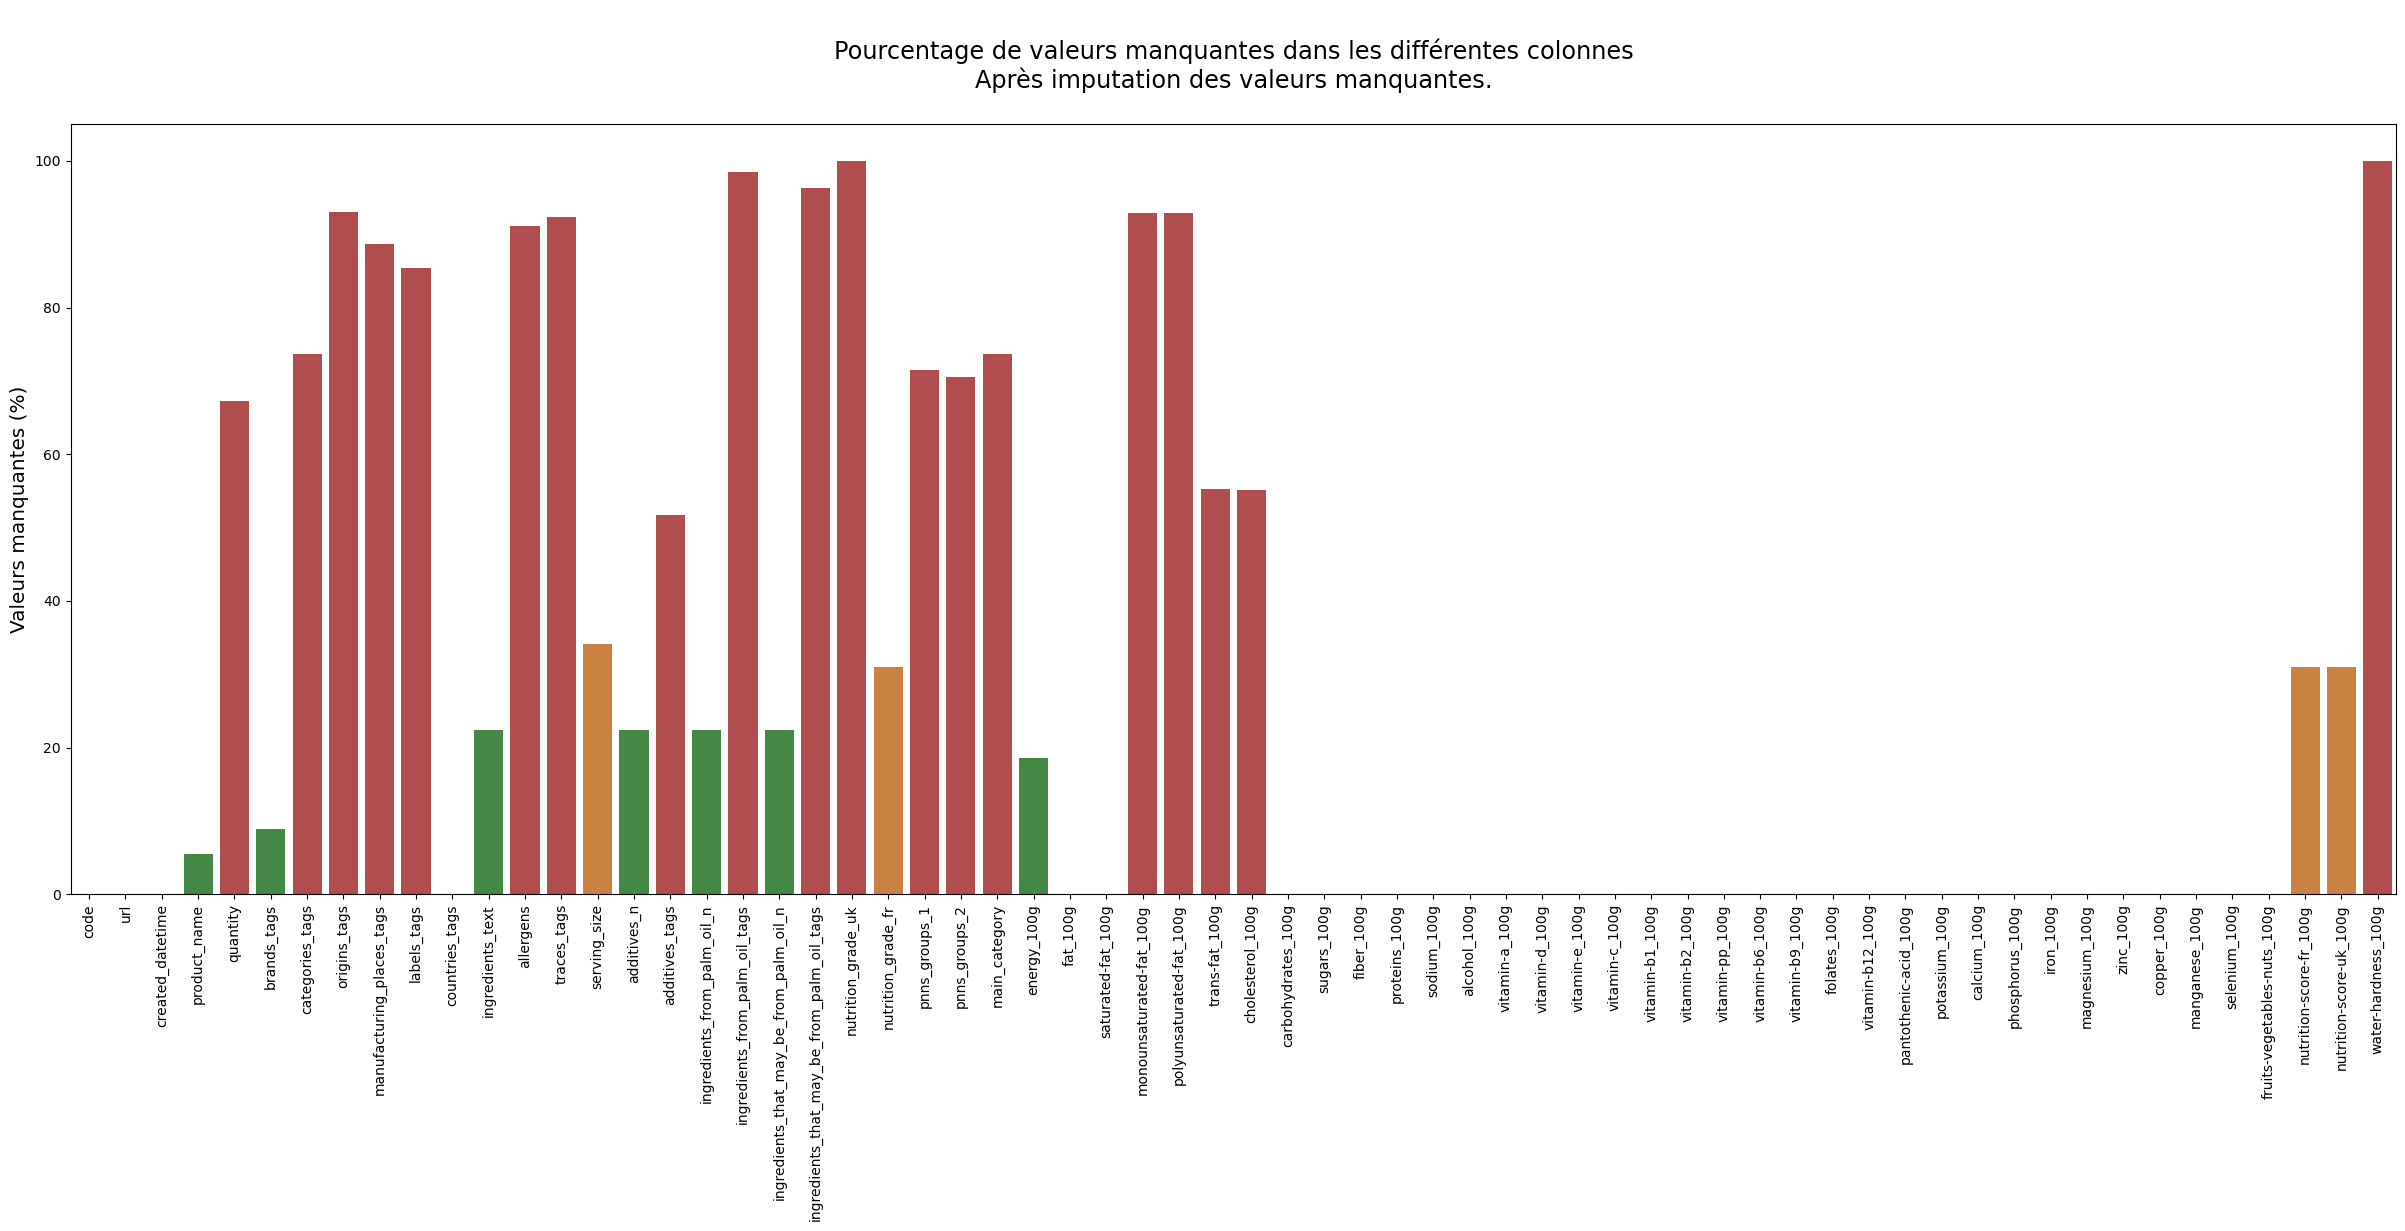


Il y a 19 colonnes avec plus de 50 % de données manquantes.


In [32]:
colonnes_incompletes = data_clean.isna().mean()

fig, ax = plt.subplots(figsize=(30,10))

# Création d'une palette personnalisée
colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100)

plt.xticks(rotation=90)
ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\nAprès imputation des valeurs manquantes.\n', fontsize='xx-large')
ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

plt.show()

print("\nIl y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.")

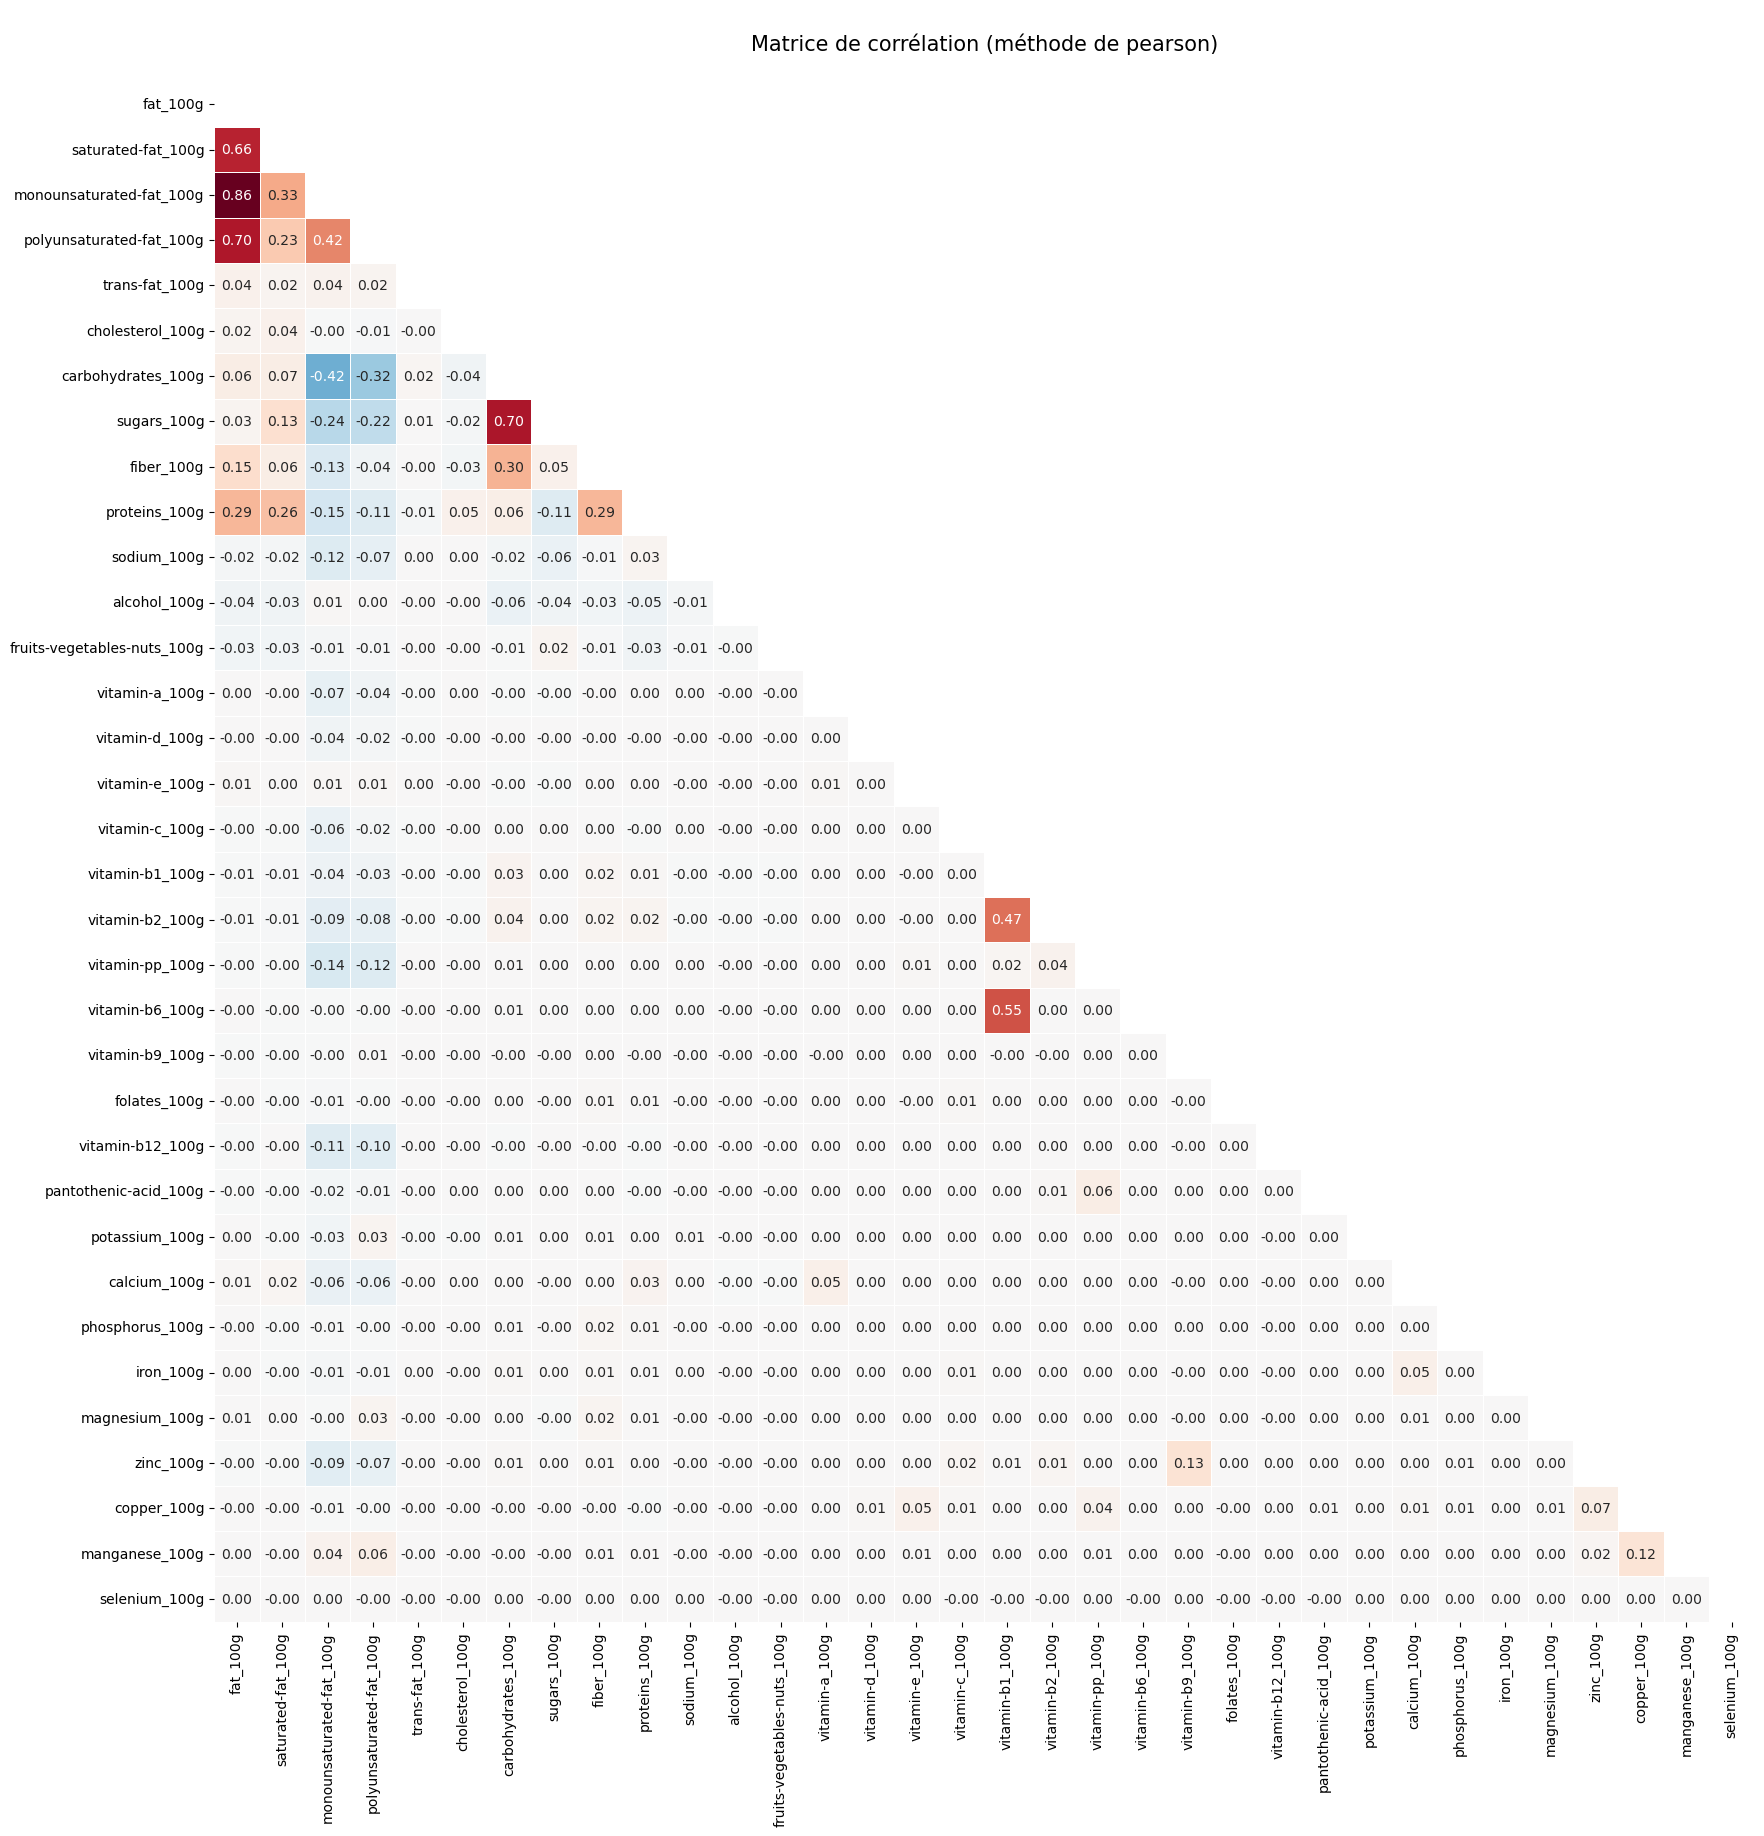

In [33]:
macro_micro = macro_nutriments + micro_nutriments.to_list()

correlation = data_clean[macro_micro].corr(numeric_only = True, method="pearson")

mask = np.triu(np.ones_like(correlation, dtype=bool), 0)

fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(correlation, mask=mask, cbar = False, center=0, cmap='RdBu_r', annot=True, annot_kws={"size": 10}, fmt='.2f', square=True, linewidths=0.5).set_title('\nMatrice de corrélation (méthode de pearson)\n', fontsize=15)

plt.show()